In [11]:
import hashlib as hh, binascii as bb

In [12]:
def enc(txt: str):
    return txt.encode("utf8")

In [13]:
%pip install pycryptodome

t = "Hello"
d = t.encode("utf8")
h1 = hh.sha256(d).digest()
h2 = hh.sha3_256(d).digest()
h3 = hh.new("blake2s", d).digest()
h4 = hh.new("ripemd160", d).digest()


print(f"SHA-256 of \t{t}: {bb.hexlify(h1)}")
print(f"SHA3-256 of \t{t}: {bb.hexlify(h2)}")
print(f"Blake2s of \t{t}: {bb.hexlify(h3)}")
print(f"RIPEMD of \t{t}: {bb.hexlify(h4)}")

# from Crypto.Hash import keccak

# h5 = keccak.new(data=d, digest_bits=256).digest()
# print(f"Keccak256 of \t{t}: {bb.hexlify(h5)}")

  Using cached pycrypto-2.6.1-cp312-cp312-macosx_10_9_universal2.whl
Note: you may need to restart the kernel to use updated packages.
SHA-256 of 	Hello: b'185f8db32271fe25f561a6fc938b2e264306ec304eda518007d1764826381969'
SHA3-256 of 	Hello: b'8ca66ee6b2fe4bb928a8e3cd2f508de4119c0895f22e011117e22cf9b13de7ef'
Blake2s of 	Hello: b'f73a5fbf881f89b814871f46e26ad3fa37cb2921c5e8561618639015b3ccbb71'
RIPEMD of 	Hello: b'd44426aca8ae0a69cdbc4021c64fa5ad68ca32fe'


## Exercise

In [14]:
t = "hello"
d = t.encode("utf8")

h1 = hh.sha224(d).digest()
h2 = hh.sha256(d).digest()
h3 = hh.sha3_224(d).digest()
h4 = hh.sha3_384(d).digest()
h5 = hh.sha3_384(d).digest()
# h6 = keccak.new(data=d, digest_bits=384).digest()

# MAC and Key Derivation

In [15]:
import hmac

mac = hmac.new(b"key", b"some_msg", hh.sha256).digest()
print(bb.hexlify(mac))

b'7daefd0e0d5b2c13bdada1ee8a73d4ee91369673dc04300f608d15415ecebb1a'


## HMAC examples

In [16]:
import hashlib, hmac, binascii


def hmac_sha256(key, msg):
    return hmac.new(key, msg, hashlib.sha256).digest()


key = b"12345"
msg = b"sample message"
print(binascii.hexlify(hmac_sha256(key, msg)))

b'ee40ca7bc90df844d2f5b5667b27361a2350fad99352d8a6ce061c69e41e5d32'


In [17]:
msg = b"hello"
key = b"cryptography"

mac = hmac.new(key, msg, hh.sha384).digest()
bb.hexlify(mac)

b'83d1c3d3774d8a32b8ea0460330c16d1b2e3e5c0ea86ccc2d70e603aa8c8151d675dfe339d83f3f495fab226795789d4'

## KDF examples

### PBKDF2
* non GPU and ASIC resistant

In [18]:
# PBKDF2 - non GPU and ASIC resistant

# ! pip install backports.pbkdf2
%pip install backports.pbkdf2
from backports.pbkdf2 import pbkdf2_hmac

salt_ = b"a random salt"
password_ = b"Say my name"
key = pbkdf2_hmac("sha256", password_, salt_,100,8)

print(f"PBKDF2 Derived key: {bb.hexlify(key)}")

Note: you may need to restart the kernel to use updated packages.
PBKDF2 Derived key: b'52a80c16ff28aa7d'


### Scrypt
* GPU, ASIC, FPGA resistant memory intensive
* Memory rq is $ 128 \cdot N \cdot r \cdot p$ bytes

In [19]:
# Scrypt - GPU, ASIC, FPGA resistant, mem intensive
%pip install scrypt
import scrypt

salt_ = b"something random"
password_ = b"Now, tell me"
key = scrypt.hash(password_, salt_, 2048, 8, 1, 32)
print(f"Scrypt Derived key: {key.hex()}")


  Using cached scrypt-0.8.24.tar.gz (55 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scrypt (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-312
      creating build/lib.macosx-10.9-universal2-cpython-312/scrypt
      copying scrypt/__init__.py -> build/lib.macosx-10.9-universal2-cpython-312/scrypt
      copying scrypt/scrypt.py -> build/lib.macosx-10.9-universal2-cpython-312/scrypt
      creating build/lib.macosx-10.9-universal2-cpython-312/scrypt/tests
      copying scrypt/tests/__init__.py -> build/lib.macosx-10.9-universal2-cpython-312/scrypt/tests
      copying scrypt/tests/test_scrypt_py3x.py -> build/

ModuleNotFoundError: No module named 'scrypt'

### Bcrypt
* a little less resistant to GPU attacks

In [20]:
%pip install bcrypt
import bcrypt

salt_ = bcrypt.gensalt()
password_ = b"As all things should be"
key = bcrypt.hashpw(password_, salt_)
print(f"Bcrypt derived key: {key.hex()}")

Note: you may need to restart the kernel to use updated packages.
Bcrypt derived key: 243262243132246566364b3768437a6a734c2e7a52486878627843582e466e356e4f37505935537671507868633832744b55413771556f435335686d


### Argon2
``recommended``

In [21]:
# Argon2 - super resistant

%pip install argon2_cffi
import argon2

salt_ = b"some salt"
password_ = b"some password"
wrong_ = b"12345"

# hash = argon2.hash_password(
#     password=password_,
#     salt=salt_,
#     time_cost=16,
#     memory_cost=1<<8,
#     parallelism=2,
#     hash_len=32,
#     type=argon2.low_level.Type.ID
# )

argon2Hasher = argon2.PasswordHasher(
    time_cost=16,
    memory_cost=1<<10,
    parallelism=2,
    hash_len=32,
    salt_len=16
)
hash = argon2Hasher.hash(password_)

print(f"\nArgon2 Derived key: {hash}")
print(f"Argon2 verification on correct password: {argon2Hasher.verify(hash, password_)}")

try:
    print(f"Argon2 verification on wrong password: {argon2Hasher.verify(hash, wrong_)}")
except:
    print(f"Argon2 verification on wrong password: False")

Note: you may need to restart the kernel to use updated packages.

Argon2 Derived key: $argon2id$v=19$m=1024,t=16,p=2$Ec2C6k9tQ2jds2Xx+shsyA$J7DjVQwk9oxUIn7UjXDhfzqwDl1354KkjKbW5Z+AGSM
Argon2 verification on correct password: True
Argon2 verification on wrong password: False


# Secure Random Generators

In [22]:
import secrets

print(secrets.randbelow(int(1e50)))

35298566146826236348024221836891926125502213955393


## Pseudo-Random Numbers examples

In [23]:
# generating random no with predefined seed

import time

seed = str(time.time()) + "|"
min = 10
max = 20
for i in range(5):
    seed1 = seed + str(i)
    hash = hh.sha256(seed1.encode("utf8")).digest()
    big_rand = int.from_bytes(hash, "big")
    rand_op = min + big_rand % (max - min + 1)
    print(f"{seed1}, {big_rand}, __ {rand_op}")

1715590962.3166249|0, 36281549853538830631354932948609932202168376094078933475358593594953125727679, __ 20
1715590962.3166249|1, 113372480443832103593853731118517085988638350861989610381683982652589436115190, __ 11
1715590962.3166249|2, 74318089863875044035295836779401454189042452966103107277358579746014393556941, __ 10
1715590962.3166249|3, 26458543693805072307198533740561940908752851142338078983462738043038254195445, __ 12
1715590962.3166249|4, 66304298287194218882509360448209345116114945058402239291807301573634515443236, __ 17


In [24]:
entropy = ""
for i in range(5):
    s = input(f"Enter something: {i+1} of 5: ")
    print(f"input {i+1} of 5: {s}")
    entropy = entropy + s + "|" + str(time.time())
seed = hh.sha256(entropy.encode("utf8")).digest().hex()

print(f"Entropy: {entropy}")
print(f"Start seed with SHA-256: {seed}")


def rng(mn, mx, seed, N):
    # min = 10
    # max = 20
    op = []
    for i in range(N):
        seedi = seed + "|" + str(i)
        hash = hh.sha256(seedi.encode("utf8")).digest()
        big_rand = int.from_bytes(hash, "big")
        x = mn + big_rand % (mx - mn + 1)
        op.append(x)
        print(f"{x}, {seedi}, {big_rand}")
    return op


min = 10
max = 20
for i in range(5):
    seedi = seed + "|" + str(i)
    hash = hh.sha256(seedi.encode("utf8")).digest()
    big_rand = int.from_bytes(hash, "big")
    op = min + big_rand % (max - min + 1)
    print(f"{seedi}, {big_rand}, --> {op}")

input 1 of 5: fgjd
input 2 of 5: fgc
input 3 of 5: dytd
input 4 of 5: ghf
input 5 of 5: asdf
Entropy: fgjd|1715590965.004661fgc|1715590966.4118311dytd|1715590967.9276721ghf|1715590969.336468asdf|1715590971.0621262
Start seed with SHA-256: 039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b
039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b|0, 45149031772797846001046279843849683564766001875475708255270084722949291050988, --> 14
039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b|1, 16431555908060886812009522313617738981126685970529776997651175334909035724365, --> 15
039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b|2, 104441126001638752357336857881245378414362035535805171128452810423801392559436, --> 10
039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b|3, 52863651149167368010902445927008771444520265878023663977045256973490299482863, --> 12
039d786f9c9e4f80a4438cbef130cfff33ef4d410b93e8854d2185d0e835082b|4, 13736067548

## Cryptographically Secure Random Generators (CSPRNG)

the seed is received from the OS itself

In [25]:
# use the secrets library

print(secrets.randbelow(int(50)))

8


In [26]:
def rng(mn, mx, seed, N):
    op = []
    for i in range(N):
        seedi = seed + "|" + str(i)
        hash = hh.sha256(seedi.encode("utf8")).digest()
        big_rand = int.from_bytes(hash, "big")
        x = mn + big_rand % (mx - mn + 1)
        op.append(x)
        print(f"{x}, {seedi}, {big_rand}")
    return op

## Example

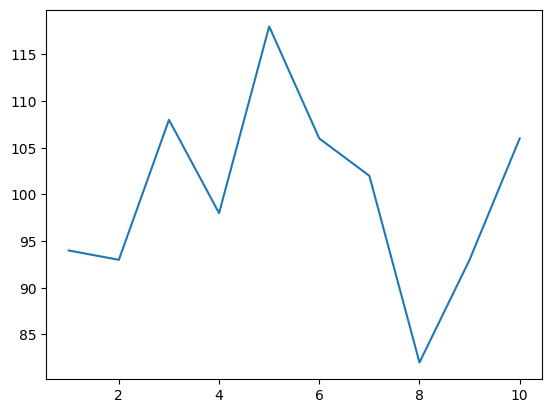

In [27]:
import numpy as np
import matplotlib.pyplot as plt

entropy = ""
for i in range(5):
    s = input(f"Enter something: {i+1} of 5: ")
    # print(f"input {i+1} of 5: {s}")
    entropy = entropy + s + "|" + str(time.time())
seed = hh.sha256(entropy.encode()).digest()

mn = 1
mx = 10

n = np.arange(1, 11)
f = np.zeros(10)

for i in range(1000):
    hash = hmac.new(str(i).encode(), seed, hh.sha256).digest()
    big_rand = int.from_bytes(hash, "big")
    x = mn + big_rand % (mx - mn + 1)
    f[x - 1] = f[x - 1] + 1
    # print(f"op_{i+1}: {x}, hash_{i+1}: {str(hash.hex())}")

plt.plot(n, f)

# Key Exchange and DHKE

## Diffie-Hellman Examples

In [28]:
%pip install pyDHE
import pyDHE

p1 = pyDHE.new()
p2 = pyDHE.new()

x1 = p1.getPublicKey()
x2 = p2.getPublicKey()

print(f"\np1 public key: {hex(x1)}")
print(f"p2 public key: {hex(x2)}")

k1 = p1.update(x2)
k2 = p2.update(x1)

print(f"p1 shared key: {hex(k1)}")
print(f"p2 shared key: {hex(k2)}")
print(f"is k1==k2?: {k1==k2}")

Note: you may need to restart the kernel to use updated packages.


SyntaxError: multiple exception types must be parenthesized (posix.py, line 66)

# Symmetric Key Ciphers

## AES examples

### AES-256-CTR

In [29]:
%pip install pyaes
%pip install pbkdf2

# CTR block mode

import pyaes, pbkdf2, secrets, os
password_ = "s3cr3t*c0d3"
salt_ = os.urandom(16)
key_ = pbkdf2.PBKDF2(password_, salt_).read(32)
print(f"\nAES excryption key: {key_.hex()}")

iv = secrets.randbits(256)
plain_text = "Text for encryption"
aes_enc = pyaes.AESModeOfOperationCTR(key_, pyaes.Counter(iv))
cipher_text = aes_enc.encrypt(plain_text)
print(f"AES Encrypted text: {cipher_text.hex()}")

print(f"Length of plain_text: {len(plain_text.encode())*2} bits")
print(f"Length of cipher_text: {len(cipher_text)*2} bits")

aes_dec = pyaes.AESModeOfOperationCTR(key_,pyaes.Counter(iv))
dec_text = aes_dec.decrypt(cipher_text)
print(f"Decrypted msg: {dec_text.decode()}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

AES excryption key: e149907bf23e0cfaa3ae14f33dbfe998e3307dcff8a6fd223b7975303084c78c
AES Encrypted text: 3b9f542016fa35ee0176d44adc6759ab47b5cc
Length of plain_text: 38 bits
Length of cipher_text: 38 bits
Decrypted msg: Text for encryption


### AES-256-GCM

In [30]:
%pip install pycryptodome
from Crypto.Cipher import AES

key_ = os.urandom(32)
msg_ = "a random msg"
print(f"\nEncryption key: {key_.hex()}")

aes_cipher = AES.new(key_,AES.MODE_GCM)
cipher_text, auth_tag = aes_cipher.encrypt_and_digest(msg_.encode())
iv = aes_cipher.nonce

aes_decipher = AES.new(key_, AES.MODE_GCM, iv)
plain_text = aes_decipher.decrypt_and_verify(cipher_text, auth_tag)

print(f"Original msg: {msg_}")
print(f"Encrypted msg: {cipher_text.hex()}")
print(f"Decrypted msg: {plain_text.decode()}")

Note: you may need to restart the kernel to use updated packages.

Encryption key: c8a9000413496812a31a2aa20945a06a3ad79d99fc0229fc6a295ca3e8b0e057


AttributeError: module 'Crypto.Cipher.AES' has no attribute 'MODE_GCM'

In [31]:
# from Crypto.Cipher import AES
# import scrypt, os


def encrypt_AES_GCM(msg, password):
    kdfsalt = os.urandom(16)
    enc_key = scrypt.hash(password.encode(), kdfsalt, 1 << 14, 8, p=1, buflen=32)
    aes_cipher = AES.new(enc_key, AES.MODE_GCM)
    cipher_text, auth_tag = aes_cipher.encrypt_and_digest(msg.encode())
    iv = aes_cipher.nonce
    return (kdfsalt, cipher_text, iv, auth_tag)


def decrypt_AES_GCM(encrypted_msg, password):
    dec_key = scrypt.hash(
        password.encode(), encrypted_msg[0], 1 << 14, r=8, p=1, buflen=32
    )
    aes_decipher = AES.new(dec_key, AES.MODE_GCM, encrypted_msg[2])
    plain_text = aes_decipher.decrypt_and_verify(encrypted_msg[1], encrypted_msg[3])
    return plain_text


msg_ = "Message for aes-256-gcm encryption with Scrypt key derivation"
password_ = "something"
encrypted_msg_ = encrypt_AES_GCM(msg_, password_)
decrypted_msg_ = decrypt_AES_GCM(encrypted_msg_, password_)

# print(f"Original msg: {msg_}")
print(f"KDF salt: {encrypted_msg_[0].hex()}")
print(f"Cipher text: {encrypted_msg_[1].hex()}")
print(f"Initial vector: {encrypted_msg_[2].hex()}")
print(f"Authorisation tag: {encrypted_msg_[3].hex()}")
print(f"Original msg: {msg_}")
try:
    print(f"Decrypted msg: {decrypted_msg_.decode()}")
except:
    print(f"Decrypted msg: {decrypted_msg_}")

NameError: name 'scrypt' is not defined

### AES-256-CBC exercise

In [ ]:
# import scrypt, hmac
import json
from Crypto.Util.Padding import pad, unpad


def encrypt_aes_256_cbc(password, msg):
    salt = os.urandom(16)
    key = scrypt.hash(password, salt, 1 << 14, r=16, p=1, buflen=64)
    encrypt_key = key[:32]
    hmac_key = key[32:]

    aes_cipher = AES.new(encrypt_key, AES.MODE_CBC)
    cipher_text = aes_cipher.encrypt(pad(msg.encode(), AES.block_size, style="pkcs7"))
    iv = aes_cipher.iv
    auth_code = hmac.new(hmac_key, msg.encode(), hashlib.sha256).digest()
    return (salt, iv, cipher_text, auth_code)


def decrypt_aes_256_cbc(password, encrypted_data):
    salt, iv, cipher_text, auth_code = encrypted_data
    key = scrypt.hash(password, salt, 1 << 14, r=16, p=1, buflen=64)
    encrypt_key = key[:32]
    hmac_key = key[32:]

    aes_decipher = AES.new(encrypt_key, AES.MODE_CBC, iv)
    try:
        plain_text = unpad(
            aes_decipher.decrypt(cipher_text), AES.block_size, style="pkcs7"
        )
    except:
        plain_text = 0

    return (plain_text, hmac.new(hmac_key, plain_text, hh.sha256).digest() == auth_code)


password_ = "my_passw"
msg_ = "secret msg"

encrypted_data_ = encrypt_aes_256_cbc(password_, msg_)
decrypted_data_ = decrypt_aes_256_cbc(password_, encrypted_data_)

enc_result = json.dumps(
    {
        "salt": encrypted_data_[0].hex(),
        "iv": encrypted_data_[1].hex(),
        "auth_code": encrypted_data_[3].hex(),
        "cipher_text": encrypted_data_[2].hex(),
    }
)

dec_result = json.dumps(
    {
        "original_msg": msg_.encode().hex(),
        "decrypted_msg": decrypted_data_[0].hex(),
        "auth_code_val": decrypted_data_[1],
    }
)

import pprint

print(enc_result)
print(dec_result)

{"salt": "aa30925f02621f31d732ae02e6424625", "iv": "118f988cf9e5be4547d24b0b67097f45", "auth_code": "4e2a8f5d3db50f94fe1ceb0547584618dfb8c98849108a719245ec61f0fd8365", "cipher_text": "161a78dc06a39b0811fbd2c0777ae514"}
{"original_msg": "736563726574206d7367", "decrypted_msg": "736563726574206d7367", "auth_code_val": true}


In [ ]:
### ChaCha20-Poly1305

In [ ]:
! pip install chacha20poly1305
from chacha20poly1305 import ChaCha20Poly1305

key_ = os.urandom(32)
nonce_ = os.urandom(12)
msg_ = "test message"
chacha_enc = ChaCha20Poly1305(key_)
ct = chacha_enc.encrypt(nonce_, msg_.encode())

chacha_dec = ChaCha20Poly1305(key_)
pt = chacha_dec.decrypt(nonce_, ct)

print(f"\nEncryption key: {key_.hex()}")
print(f"Nonce: {nonce_.hex()}")
print(f"Original msg: {msg_}")
print(f"ct: {ct.hex()}")
try: 
    print(f"pt: {pt.decode()}")
except:
    print(f"pt: {pt.hex()}")


Encryption key: fedf79642e79c831fe34ec3456b08ffac99ad0a756545a2c0f2f4d295d49286e
Nonce: 34a0d3e2a702aae123244cf3
Original msg: test message
ct: 769d7c53cbbf9b98e503f78af8998ba37bbf52c29ece6dd2a6dd64b3
pt: test message


# Asymmetric Key Ciphers

## RSA Examples

In [ ]:
! pip install pycryptodome

from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
# import binascii as bb

key_pair_ = RSA.generate(1024)

pub_key_ = key_pair_.publickey()
pub_key_pem_ = pub_key_.exportKey()
pvt_key_pem_ = key_pair_.exportKey()

print(f"\nPub key: (n:{pub_key_.n}, e:{pub_key_.e})")
print(f"Pub key (PEM format): {pub_key_pem_}")
print(f"Pvt key: (n:{pub_key_.n}, e:{key_pair_.d})")
print(f"Pvt key (PEM format): {pvt_key_pem_}")

msg = "A message for encryption"

enc = PKCS1_OAEP.new(pub_key_)
cipher_text = enc.encrypt(msg.encode())
print(f"Cipher text: {cipher_text.hex()}")

dec = PKCS1_OAEP.new(key_pair_)
plain_text = dec.decrypt(cipher_text)
print(f"Plain Text: {plain_text}")


Pub key: (n:123923054789587103724805368424398024466348374162980334462576875368499470177011484733000045023590775861743063964861689089328493781669928922878635479353032859581861088946999603223477775341990741212381734355894447923609786024488552430951703539803437249220619094799366358724578173092791039749843012154119081658299, e:65537)
Pub key (PEM format): b'-----BEGIN PUBLIC KEY-----\nMIGfMA0GCSqGSIb3DQEBAQUAA4GNADCBiQKBgQCweOfaVwRM9jI6R8kWxlUMWdHX\no31JwhxtFrTy6TFQKI8cyet/DrVD8zPTxt7uLOLzTFMQvYvRSYghXcvRti/bUDnQ\ngUbOq+/E3pmvBjwwC66XWGTWeaCvtd4Ws4T8EVwXfqdYidS1IlG3ZiarT+vRBc2U\nu50A3/7x/hIVTdeHuwIDAQAB\n-----END PUBLIC KEY-----'
Pvt key: (n:123923054789587103724805368424398024466348374162980334462576875368499470177011484733000045023590775861743063964861689089328493781669928922878635479353032859581861088946999603223477775341990741212381734355894447923609786024488552430951703539803437249220619094799366358724578173092791039749843012154119081658299, e:9287091011170133816689527549573994799372

## ECC

### ECC General Concepts

In [ ]:
! pip install tinyec
from tinyec.ec import SubGroup, Curve

field = SubGroup(p=17, g=(15,13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print(f"Curve: {curve}")

for k in range(0, 25):
    p = k*curve.g
    print(f"{k}*G = ({p.x}, {p.y})")

Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
0*G = (None, None)
1*G = (15, 13)
2*G = (2, 10)
3*G = (8, 3)
4*G = (12, 1)
5*G = (6, 6)
6*G = (5, 8)
7*G = (10, 15)
8*G = (1, 12)
9*G = (3, 0)
10*G = (1, 5)
11*G = (10, 2)
12*G = (5, 9)
13*G = (6, 11)
14*G = (12, 16)
15*G = (8, 14)
16*G = (2, 7)
17*G = (15, 4)
18*G = (None, None)
19*G = (15, 13)
20*G = (2, 10)
21*G = (8, 3)
22*G = (12, 1)
23*G = (6, 6)
24*G = (5, 8)


In [ ]:
from tinyec import registry

curve = registry.get_curve("secp192r1")
print(f"Curve: {curve}")

for k in range(0, 10):
    p = k * curve.g
    print(f"{k} * G = ({p.x}, {p.y})")

print(f"Cofactor: {curve.field.h}")
print(f"Cyclic group order: {curve.field.n}")

nG = curve.field.n * curve.g
print(f"n * G: ({nG.x}, {nG.y})")

Curve: "secp192r1" => y^2 = x^3 + 6277101735386680763835789423207666416083908700390324961276x + 2455155546008943817740293915197451784769108058161191238065 (mod 6277101735386680763835789423207666416083908700390324961279)
0 * G = (None, None)
1 * G = (602046282375688656758213480587526111916698976636884684818, 174050332293622031404857552280219410364023488927386650641)
2 * G = (5369744403678710563432458361254544170966096384586764429448, 5429234379789071039750654906915254128254326554272718558123)
3 * G = (2915109630280678890720206779706963455590627465886103135194, 2946626711558792003980654088990112021985937607003425539581)
4 * G = (1305994880430903997305943738697779408316929565234787837114, 3981863977451150342116987835776121688410789618551673306674)
5 * G = (410283251116784874018993562136566870110676706936762660240, 1206654674899825246688205669651974202006189255452737318561)
6 * G = (4008504146453526025173196900303594155799995627910231899946, 326375930130517690699080663658783810002269009502

In [ ]:
import secrets

pvt_key = secrets.randbelow(curve.field.n)
pub_key = pvt_key * curve.g
print(f"Pvt key: {pvt_key}")
print(f"Pub key: {pub_key}")

Pvt key: 3075142052944379224864014347625765528476044393654701930539
Pub key: (4169585117732128636516392028343764811063360311890397311170, 3413936030692527990161737973918380106123851504036653578390) on "secp192r1" => y^2 = x^3 + 6277101735386680763835789423207666416083908700390324961276x + 2455155546008943817740293915197451784769108058161191238065 (mod 6277101735386680763835789423207666416083908700390324961279)


In [ ]:
# EC point compression
! pip install nummaster
from nummaster.basic import sqrtmod

def compress_point(point):
    return (point[0], point[1]&1)

def decompress_point(cpoint, p, a, b):
    x, parity = cpoint
    y = sqrtmod(pow(x,3,p)+ a*x+b, p)
    if parity == y&1:
        return (x, y)
    else:
        return (x, p-y)
    
p,a,b = 17,0,7
point = (10,15)
cpoint = compress_point(point)
dpoint = decompress_point(cpoint, p, a, b)

print(f"Original point: {point}")
print(f"Compressed point: {cpoint}")
print(f"Decompressed point: {dpoint}")

Original point: (10, 15)
Compressed point: (10, 1)
Decompressed point: (10, 15)


### ECC Key Exchange

In [ ]:
# from tinyec import registry
# import secrets


def compress(pub_key):
    return hex(pub_key.x * 2 + (pub_key.y & 1))


curve = registry.get_curve("brainpoolP256r1")

pvt1 = secrets.randbelow(curve.field.n)
pvt2 = secrets.randbelow(curve.field.n)

pub1 = pvt1 * curve.g
pub2 = pvt2 * curve.g

shared1 = pub2 * pvt1
shared2 = pub1 * pvt2

print(f"Private key1: {hex(pvt1)}")
print(f"Private key2: {hex(pvt2)}")
print(f"Public key1: {compress(pub1)}")
print(f"Public key2: {compress(pub2)}")
print(f"Shared Key 1: {compress(shared1)}")
print(f"Shared key 2: {compress(shared2)}")
print(f"Shared key matches: {shared1==shared2}")

Private key1: 0x9c9a6a43430afbdb26b5bcbfda84b30b6eb152bdf074636f46fd9b026433b590
Private key2: 0x9d4ee74f732654f6ac72d678fc0b842b73f802539fdb2cd27e9d4247fb59c610
Public key1: 0x9401ed02912c4a40f41f255fcb5b022bbcaee490796fefaec2343fa6d055994
Public key2: 0xa340c9d0a0fff12eba592c13d147121ef1b35ddf5ad924a39121b20438bade3
Shared Key 1: 0x3a468141d89c4c9e2ea2571b5e9b8b056b6470d0695c37e5d8dacff4bb7c194b
Shared key 2: 0x3a468141d89c4c9e2ea2571b5e9b8b056b6470d0695c37e5d8dacff4bb7c194b
Shared key matches: True


In [ ]:
type(pub1)

tinyec.ec.Point

In [ ]:
str(pub1.x) + str(pub2.y)

'209205325689002464764710681202529949787265082368419981165653715085894789857071510459982042511174282794630239738997345030037259180148701539119853274650641'

### ECC Encryption/Decryption
`ECC Based Hybrid Enryption/Decryption with AES-256-GCM`

In [ ]:
# from tinyes import registry
# from Crypto.Cipher import AES
# import hashlib, secrets, binascii


def encrypt_AES_GCM(msg, shared_key):
    aes_cipher = AES.new(shared_key, AES.MODE_GCM)
    ct, auth_tag = aes_cipher.encrypt_and_digest(msg.encode())
    return (aes_cipher.nonce, ct, auth_tag)


def decrypt_AES_GCM(encrypto, shared_key):
    nonce, ct, auth_tag = encrypto
    aes_decipher = AES.new(shared_key, AES.MODE_GCM, nonce)
    pt = aes_decipher.decrypt_and_verify(ct, auth_tag)
    return pt


curve = registry.get_curve("brainpoolP256r1")


def ecc_pt_to_256_bit_key(point):
    d = str(point.x) + str(point.y)
    sha = hh.sha256(d.encode()).digest()
    return sha


def encrypt_ecc(msg, pub2):
    pvt1 = secrets.randbelow(curve.field.n)
    pub1 = pvt1 * curve.g
    shared_key = ecc_pt_to_256_bit_key(pub2 * pvt1)
    encrypto = encrypt_AES_GCM(msg, shared_key)
    return (encrypto, pub1)


def decrypt_ecc(encrypted, pvt2):
    encrypto, pub1 = encrypted
    shared_key = ecc_pt_to_256_bit_key(pub1 * pvt2)
    pt = decrypt_AES_GCM(encrypto, shared_key)
    return pt


pvt2 = secrets.randbelow(curve.field.n)
pub2 = pvt2 * curve.g


msg = "I am inevitable"
encrypted = encrypt_ecc(msg, pub2)
decrypted = decrypt_ecc(encrypted, pvt2)

print(decrypted)

b'I am inevitable'


### ECIES - Elliptic Curve Integrated Encryption Scheme
`ECC + KDF + Symm Encr + MAC`

In [ ]:
! pip install eciespy
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

pvt2 = generate_eth_key()
pub2 = pvt2.public_key

msg = "I am Ironman"
encrypted = encrypt(pub2.to_hex(), msg.encode())
decrypted = decrypt(pvt2.to_hex(), encrypted)

print(f"\nEncryption key (pub): {pub2.to_hex()}")
print(f"Decryption key (pvt): {pvt2.to_hex()}")
print(f"Cipher text: {encrypted.hex()}")
print(f"Plain text: {decrypted}")



Encryption key (pub): 0xa562f29c3ba065e591f4e7a7491190197643ff77cb877f31d6d751365063ec364a5f9471923cf06b0d50e6f34ff8c4f65eb8969e7df2c98995e689d26937c4f5
Decryption key (pvt): 0x33a9263a185e0bbf6b67952f27133f36502b9378518c8564d372fdef65a5ae64
Cipher text: 04937ea58f8c1e209709e52d201995061de3465846eea65e685f7eb99acbaa58a0d499b83df0033b287e2603afa707eed26e2c5e773dffd11176977dc3ebdb35adb72639c3ba5ecca700149db542204a960c2e36fe35da481417e68c6f018e128afe3c588e75ac9b3a5d735189
Plain text: b'I am Ironman'


# Digital Signature

## RSA Sign
`use 3072 bits signature for real world use`

In [33]:
from Crypto.PublicKey import RSA

key_pair = RSA.generate(1 << 10)
print(f"Pub key: (n:{hex(key_pair.n)}, e:{hex(key_pair.e)})")
print(f"Pvt key: (n:{hex(key_pair.n)}, d:{hex(key_pair.d)})")

msg = "Thanos is coming"
hash = int.from_bytes(hh.sha512(msg.encode()).digest(), byteorder="big")
sign = pow(hash, key_pair.d, key_pair.n)
print(f"Signature: {sign}")

hash1 = pow(sign, key_pair.e, key_pair.n)
print(f"Signature validity: {hash==hash1}")

SyntaxError: multiple exception types must be parenthesized (RSA.py, line 585)

In [34]:
from Crypto.PublicKey import RSA
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
from Crypto.Hash import SHA256

key_pair = RSA.generate(1024)
pub_key = key_pair.publickey()

print(f"Pvt key: {key_pair.exportKey()}")
print(f"Pub key: {pub_key.exportKey()}")

msg = "Message for RSA signing"
hash = SHA256.new(msg.encode())
signer = PKCS115_SigScheme(key_pair)
sign = signer.sign(hash)
print(f"Signature: {sign.hex()}")

verifier = PKCS115_SigScheme(pub_key)
try:
    verifier.verify(hash, sign)
    print("Signature is valid")
except:
    print("Signature invalid")

SyntaxError: multiple exception types must be parenthesized (RSA.py, line 585)

## ECDSA Sign

In [ ]:
! pip install pycoin==0.70
from pycoin.ecdsa import generator_secp256k1, sign, verify

ImportError: cannot import name 'generator_secp256k1' from 'pycoin.ecdsa' (c:\Users\jitbi\AppData\Local\Programs\Python\Python310\lib\site-packages\pycoin\ecdsa\__init__.py)